solution: [0.50000304 1.49999698] iterations: 8


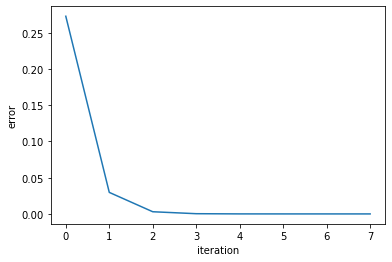

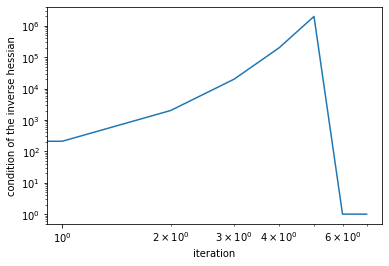

In [3]:
import numpy as np
import scipy.optimize as opt
from numpy.linalg import norm
import matplotlib.pyplot as plt


def constr(x):
    return 2 - x[0] - x[1]

def alg(mu0, tol):
    conv = False
    mu = mu0
    x0 = np.zeros(2)
    x = x0
    k = 0
    errors = []
    hess_cond = []
    while conv == False:
        fun = lambda x: x[0]**2 + 4*x[0]*x[1] + 5*x[1]**2 - 10*x[0] - 20*x[1] + mu/2*(2 - x[0] - x[1])**2
        sol = opt.minimize(fun, x)
        x = sol.x
        invHess = sol.hess_inv
        hess_cond.append(np.linalg.cond(invHess))
        #print(x)
        mu = mu*10
        err = norm(constr(x))
        errors.append(err)
        conv = (norm(constr(x)) <= tol)
        k +=1
    return x, k, errors, hess_cond

def plot(mu0):
    x, it, errors, hess_cond = alg(m0, 1e-7)
    print("solution:", x, "iterations:", it)
    plt.plot(errors)
    plt.xlabel("iteration")
    plt.ylabel("error")
    plt.show()

    plt.plot(hess_cond)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("iteration")
    plt.ylabel("condition of the inverse hessian")

m0 = 10
plot(m0)

solution: [0.50000303 1.499997  ] iterations: 6


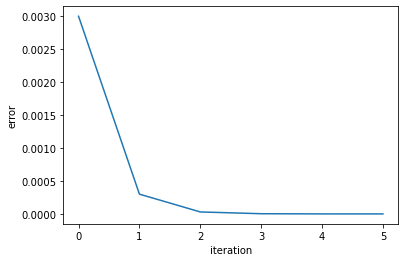

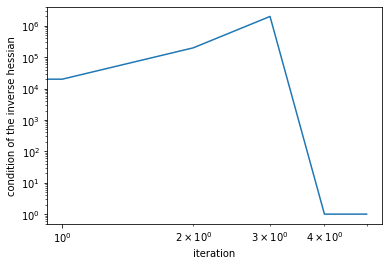

In [4]:
m0 = 10**3
plot(m0)

solution: [0.50000302 1.499997  ] iterations: 4


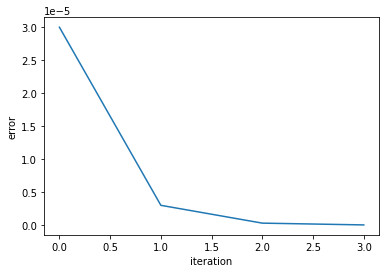

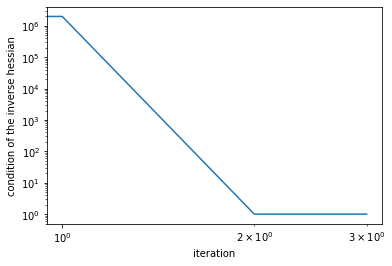

In [5]:
m0 = 10**5
plot(m0)

solution: [0.50000031 1.49999971] iterations: 2


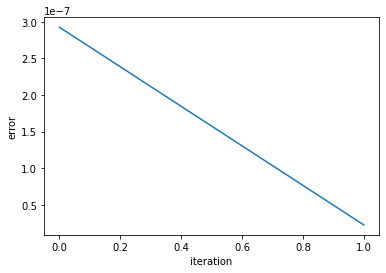

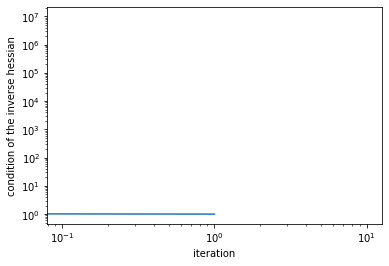

In [6]:
m0 = 10**7
plot(m0)